In [1]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
#%matplotlib inline

import itertools

import random
import math
import math
from Drosophila_project.General_funcitons_drosophila import *

# real_monkey_dots_open_loop
# gray_four_directions_open_loop
path_data = r"Z:\Freely swimming larvae\Erze\gray_four_directions_open_loop_2_min_0_07\combined_data.hdf5"
key = "all_freely_swimming_tracking_data_pandas"



In [2]:
df_round_mean, fishes, stimuli = find_distance_round_x_y(path_data=path_data, key=key, resample_to="1S")
df_round_mean = df_round_mean.drop('trial', axis=1)
df_round_mean =  put_relative_time(df = df_round_mean, fishes = fishes)
df_round_dist = start_start(df=df_round_mean)


C:\Users\ag-bahl\PycharmProjects\Drosophila_project\General_funcitons_drosophila.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fish['relative_time'] = df_fish['time_absolute'] - df_fish['time_absolute'].min()
C:\Users\ag-bahl\PycharmProjects\Drosophila_project\General_funcitons_drosophila.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fish['relative_time_minutes'] = df_fish['relative_time'].dt.total_seconds()
C:\Users\ag-bahl\PycharmProjects\Drosophila_project\General_funcitons_drosophi

In [3]:
import pandas as pd
df_round_mean.reset_index(drop = False,inplace = True)
df_round_mean['relative_time'] = df_round_mean['time_absolute'] - df_round_mean['time_absolute'].min()
df_round_mean['relative_time_minutes'] = df_round_mean['relative_time'].dt.total_seconds()
df_round_mean['relative_time_hours'] = df_round_mean['relative_time'].dt.total_seconds() / 3600
df_round_mean

,index,stimulus_name,trial,time_absolute,setup_index,arena_index,experiment_repeat,experiment_ID,fish_index,time,...,additional_tracking_info0,additional_tracking_info1,additional_tracking_info2,radius,distance,relative_time,relative_time_minutes,angle_pointing,angle_turning,relative_time_hours
0,0,gray,2,2023-07-07 11:42:48+02:00,2.0,0.0,0.0,20.0,0.0,147.685202,...,NaN,NaN,NaN,0.598495,0.598495,0 days 00:16:27,987.0,337.485187,0.000000,0.274167
1,1,gray,2,2023-07-07 11:42:49+02:00,2.0,0.0,0.0,20.0,0.0,148.214490,...,NaN,NaN,NaN,0.590560,0.008086,0 days 00:16:28,988.0,111.587840,0.000000,0.274444
2,2,gray,2,2023-07-07 11:42:50+02:00,2.0,0.0,0.0,20.0,0.0,149.279759,...,NaN,NaN,NaN,0.597247,0.008140,0 days 00:16:29,989.0,96.506924,134.102653,0.274722
3,3,gray,2,2023-07-07 11:42:51+02:00,2.0,0.0,0.0,20.0,0.0,150.198601,...,NaN,NaN,NaN,0.597604,0.000550,0 days 00:16:30,990.0,192.139147,15.080916,0.275000
4,4,gray,2,2023-07-07 11:42:52+02:00,2.0,0.0,0.0,20.0,0.0,150.818173,...,NaN,NaN,NaN,0.599855,0.003242,0 days 00:16:31,991.0,NaN,95.632222,0.275278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12757,787,motion_rightward,1,2023-07-07 13:14:57+02:00,3.0,7.0,0.0,103.0,0.0,235.568747,...,NaN,NaN,NaN,0.461477,0.015633,0 days 01:48:36,6516.0,13.673891,4.043957,1.810000
12758,788,motion_rightward,1,2023-07-07 13:14:58+02:00,3.0,7.0,0.0,103.0,0.0,236.505965,...,NaN,NaN,NaN,0.454930,0.016503,0 days 01:48:37,6517.0,6.984111,1.456728,1.810278
12759,789,motion_rightward,1,2023-07-07 13:14:59+02:00,3.0,7.0,0.0,103.0,0.0,237.451016,...,NaN,NaN,NaN,0.451195,0.014500,0 days 01:48:38,6518.0,3.536203,6.689780,1.810556
12760,790,motion_rightward,1,2023-07-07 13:15:00+02:00,3.0,7.0,0.0,103.0,0.0,238.488375,...,NaN,NaN,NaN,0.448147,0.018909,0 days 01:48:39,6519.0,0.000000,3.447908,1.810833


Slope: -1.1887295178797303e-06
Intercept: 0.1338814026066459


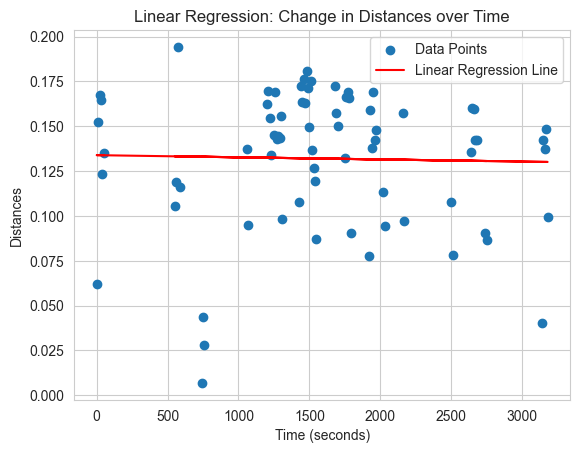

In [6]:
df_round_mean, fishes, stimuli = find_distance_round_x_y(path_data=path_data, key=key, resample_to="10S")
df_round_dist = start_start(df=df_round_mean)
df_round_mean = df_round_mean.drop('trial', axis=1)
df_round_mean.reset_index(inplace = True)
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
for fish in fishes:
    df_fish = df_round_mean[df_round_mean['folder_name']==fish]
    df_fish = df_fish[df_fish['distance']<=0.2]
    df_fish['relative_time'] = df_fish['time_absolute'] - df_fish['time_absolute'].min()
    df_fish['relative_time_minutes'] = df_fish['relative_time'].dt.total_seconds()#/ 60


    # Step 2: Define your data
    time = np.array(df_fish['relative_time_minutes'].tolist())
    time = time[~np.isnan(time)]

    distances = np.array(df_fish['distance'].tolist())

    distances = distances[~np.isnan(distances)]

    # Adjust the time array to match the number of distances
    time = time[:distances.shape[0]]

    # Rest of the code remains the same
    time = time.reshape(-1, 1)
    regression_model = LinearRegression()
    regression_model.fit(time, distances)
    predicted_distances = regression_model.predict(time)
    slope = regression_model.coef_[0]
    intercept = regression_model.intercept_

    print("Slope:", slope)
    print("Intercept:", intercept)

    plt.scatter(time, distances, label="Data Points")
    plt.plot(time, predicted_distances, color="red", label="Linear Regression Line")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Distances")
    plt.title("Linear Regression: Change in Distances over Time")
    plt.legend()
    plt.show()
    break


Slope: 1.5621895591163637e-06
Intercept: 0.13253384107861593


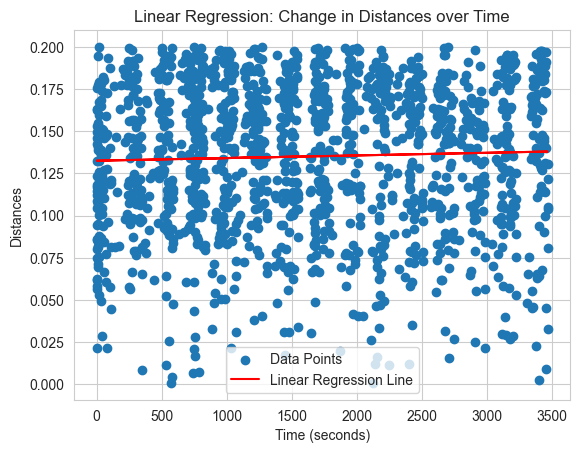

In [7]:
df_round_mean, fishes, stimuli = find_distance_round_x_y(path_data=path_data, key=key, resample_to="10S")
df_round_dist = start_start(df=df_round_mean)
df_round_mean = df_round_mean.drop('trial', axis=1)
df_round_mean.reset_index(inplace = True)
df_round_mean.dropna(subset = ['distance'], inplace=True)
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
time = []
distances = []
for fish in fishes:
    df_fish = df_round_mean[df_round_mean['folder_name']==fish]
    df_fish = df_fish[df_fish['distance']<=0.2]
    df_fish['relative_time'] = df_fish['time_absolute'] - df_fish['time_absolute'].min()
    df_fish['relative_time_minutes'] = df_fish['relative_time'].dt.total_seconds()#/ 60


    # Step 2: Define your data
    time_1 = np.array(df_fish['relative_time_minutes'].tolist())
   # time_1 = time[~np.isnan(time_1)]
    time.append(time_1)
    distances_1 = np.array(df_fish['distance'].tolist())

   # distances_1 = distances_1[~np.isnan(distances_1)]
    distances.append(distances_1)

import itertools
time = np.array(list(itertools.chain.from_iterable(time)))
distances = np.array(list(itertools.chain.from_iterable(distances)))

# Adjust the time array to match the number of distances
time = time[:distances.shape[0]]

# Rest of the code remains the same
time = time.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(time, distances)
predicted_distances = regression_model.predict(time)
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

print("Slope:", slope)
print("Intercept:", intercept)

plt.scatter(time, distances, label="Data Points")
plt.plot(time, predicted_distances, color="red", label="Linear Regression Line")
plt.xlabel("Time (seconds)")
plt.ylabel("Distances")
plt.title("Linear Regression: Change in Distances over Time")
plt.legend()
plt.show()